# <div align="center"> Projet Machine Learning 2</div>

#### <div>Le but de ce projet est d'effectuer une classification d'images du jeu de données de cifar-10.</div>



#### Dans ce notebook nous utilisons la librairie Keras.


In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:

#            --------------------  Fonctions -----------
              # plot_training_loss(fit)
              # plot_accuracy(fit)
              # plot_matrix_corr(fit,confusion_matrice,class_names)
        
# ------------------------- Pour initialiser les modèles ---------------
def plot_training_loss(fit,nom=""):
    plt.plot(fit.history['loss'])
    plt.plot(fit.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    plt.savefig("training loss"+"-"+nom)
    #plt.show()
def plot_accuracy(fit,nom=""):
    plt.plot(fit.history['accuracy'])
    plt.plot(fit.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.savefig("training accuracy"+"-"+nom)
    #plt.show()
def plot_matrix_corr(fit,confusion_matrice,class_names,nom=""):
    sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted', fontsize=12)
    plt.title("Correlation matrix")
    plt.ylabel('True', fontsize=12)
    plt.savefig("correlationmatrix"+nom)
    #plt.show()

#                 ----------  Pour lancer les models sauvegardés --------------
def plot_training_loss_save(history,nom=""):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    plt.savefig("training loss"+ "-"+nom)
    plt.show()

def plot_accuracy_save(history):
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

def plot_matrix_corr_save(history,confusion_matrice,class_names):
    sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted', fontsize=12)
    plt.title("Correlation matrix")
    plt.ylabel('True', fontsize=12)
    plt.show()

#                  -----      <!> A généraliser sur les modèles  -----
# epoch_final = 100    +  




### 1. Chargement, exploration & visualistion des données de cifar-10


In [29]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train.shape
X_test.shape 
# Entrainement image 32 x 32 ; 3 : rgb channels ; 50 000 : nb images train

(10000, 32, 32, 3)

In [30]:
X_test.shape
# Test image 32 x 32 ; 3 : rgb channels ; 10 000 : nb images test

(10000, 32, 32, 3)

In [31]:
X_train[0]; # 3 dimensional array
y_train.shape

(50000, 1)

In [32]:
#y_train.shape  50 000 sample 1 dimensional array
# 6 <-> frog ; 9 <-> truck ; 4 <-> deer ; 1 <-> automobile

# 5 premiers éléments y_train[:5]
# on remarque que chq élément est imbriqué dans un array exemple :  [[6],[9],...] et non [6,9,...] 

# il faut pour cela redimensionner via reshape(-1,) pour 1 dim array
y_train=y_train.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
# classe 10 éléments 0 à 9
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def plot_sample(X,y, index):
# redim taille image
    plt.figure(figsize = (15,2))
# voir à quoi ressemble une image
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

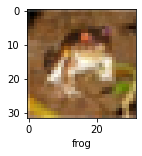

In [35]:
plot_sample(X_train,y_train,0)

# plot_sample(X_train,y_train,1)

#### Normalisation des données:


In [36]:
# Normalizer data
X_train = X_train/255
X_test = X_test/255

### 2. Construction & evaluation des modéles

#### 2.1 Modéle 1 => modele ann 🖣
(Flaten)+(Dense+Relu)+(Dense+Relu)+(Dense+Sigmoid)

In [39]:
# Construisons le modèle ANN (Artificial neural network)

# input image 32 x 32 x 3
#  2 deep layers : 1rst deep layer with 3000 neurons, 2nd deep layer 1000 neurons avc fct relu
# Last layer : 10 neurons avec fct sigmoid <-> 10 categories de notre classes 'classes'

# sigmoïd <-> s(z_k) = 1/ (1+ e^(-z_k))

ann = models.Sequential(
[
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# 7.b.2
# Optimizer SGD <-> Gradient stochastique  ;   fct de perte = entropie croisée parsemé par catégorie
# Mesure <-> precision

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# on entraine les neurons
# 3 decembre  epochs = 20
fit_ann=ann.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test))



# accuracy faible 49.5% sur samples train ;    loss : 1.4320


Epoch 1/20
1563/1563 [==============================] - 116s 73ms/step - loss: 1.8117 - accuracy: 0.3569 - val_loss: 1.6818 - val_accuracy: 0.4035
Epoch 2/20
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6230 - accuracy: 0.4272 - val_loss: 1.6650 - val_accuracy: 0.4031
Epoch 3/20
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5400 - accuracy: 0.4594 - val_loss: 1.7688 - val_accuracy: 0.3908
Epoch 4/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4814 - accuracy: 0.4770 - val_loss: 1.4982 - val_accuracy: 0.4684
Epoch 5/20
1563/1563 [==============================] - 121s 78ms/step - loss: 1.4306 - accuracy: 0.4975 - val_loss: 1.4993 - val_accuracy: 0.4675
Epoch 6/20
1563/1563 [==============================] - 112s 72ms/step - loss: 1.3864 - accuracy: 0.5125 - val_loss: 1.5482 - val_accuracy: 0.4468
Epoch 7/20
1563/1563 [==============================] - ETA: 0s - loss: 1.3484 - accuracy: 0.5283

KeyboardInterrupt: 

In [ ]:
#import pickle
#  sauvegarder notre modèle ANN_Model_1.h5
# ANN_Model_1 : 5 epochs
# ANN_Model_2 : 20 epochs
#ann.save('ANN_Model_2.h5')
# on sauvegarde le modèle.fit
#with open('ANN_Model_2_fit', 'wb') as file_pi:
#    pickle.dump(fit_ann.history, file_pi)

In [ ]:
# relancer le model_1 ANN directement ici
#from keras.models import load_model

# ouvrir via pickle
#history = pickle.load(open('ANN_Model_1_fit',"rb"))


#ann_model_1 = load_model('ANN_Model_1.h5')

#fit_ann_2 = ann_model_1.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

# <!> utiliser plot training_loss_save
#plot_training_loss_save(history)



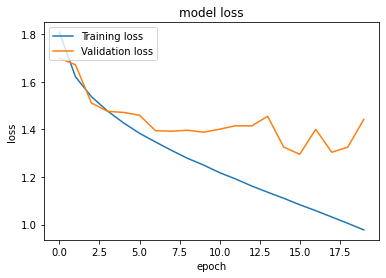

In [32]:
plot_training_loss(fit_ann, "20 epochs");


In [29]:
 
plot_training_loss(ann_model_2);

NameError: name 'ann_model_2' is not defined

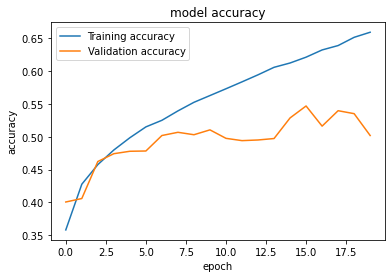

In [22]:
plot_accuracy(fit_ann,"20epochs")

In [24]:
# Evaluons notre modèle sur les données test
ann.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


313/313 [==============================] - 11s 36ms/step - loss: 1.4420 - accuracy: 0.5018


[1.441990852355957, 0.501800000667572]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# 
# Recal = TruePositives / (TruePositives + FalseNegatives)
# hausse Recal => minimise faux négatif

# Mesure F = (2 * Précision * Rappel) / (Précision + Rappel)
# Mesure F ~ 0 => precision + rappel médiocre
# Mesure F1 ~ 1 => précision + rappel excellent

# Precision = TruePositives / (TruePositives + FalsePositives)
# hausse Precision => minimise faux positif

# Classification report ANN

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

Classfication Report 
               precision    recall  f1-score   support

           0       0.63      0.57      0.60      1000
           1       0.46      0.84      0.59      1000
           2       0.50      0.39      0.44      1000
           3       0.43      0.23      0.30      1000
           4       0.74      0.16      0.26      1000
           5       0.56      0.30      0.40      1000
           6       0.34      0.87      0.49      1000
           7       0.59      0.64      0.61      1000
           8       0.77      0.53      0.63      1000
           9       0.57      0.48      0.52      1000

    accuracy                           0.50     10000
   macro avg       0.56      0.50      0.48     10000
weighted avg       0.56      0.50      0.48     10000



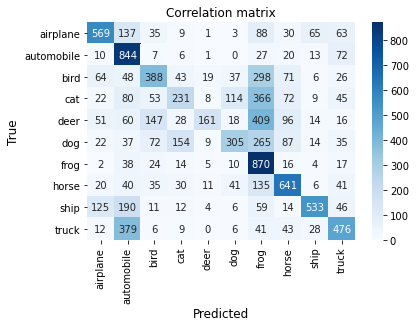

In [27]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_ann,conf,classes,"ANN_20epochs")

#### 2.1 Modéle 2 => modele cnn 🖣
(Convolution+Relu) + (Pooling) + (Convolution+Relu) + (Flaten) + (Dense+Relu) + (Dense+softmax)

In [52]:
# CNN <-> Feature Extraction + Classification

# Feature Extraction <-> (1) Convolution + Relu (oreille,yeux) -> (2) Pooling  -> (3) Convo + Relu(head,..)
# -> (4) Pooling  .. flatten
# Classification <-> Is it this category ?

# softmax <-> s(k)= e^(z_k)/ sum(e^(z_i),{i=1..n})
# relu <-> r(z_k) = max(z_k,0)

cnn = models.Sequential(
[
    #cnn
    
    # (1) Convolution + Relu
    # filters = 32 <=> on peut détecter 32 zones différentes sur l'image
    # kernel_size <=> taille du filtre ici 3 x 3
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    
    # (2) Pooling ici on choisit MaxPooling
    layers.MaxPooling2D((2,2)),
    
    # (3) + (4)
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [53]:
# Optimizer adam <=> optimization algorithm 
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [54]:
# Entrainons model cnn
fit_cnn = cnn.fit(X_train, y_train, epochs = 20,validation_data=(X_test,y_test));

# accuracy  train :  ~ 0.78

Epoch 1/20
1563/1563 [==============================] - 95s 60ms/step - loss: 1.4899 - accuracy: 0.4663 - val_loss: 1.2450 - val_accuracy: 0.5575
Epoch 2/20
1563/1563 [==============================] - 94s 60ms/step - loss: 1.1436 - accuracy: 0.5993 - val_loss: 1.0896 - val_accuracy: 0.6224
Epoch 3/20
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0038 - accuracy: 0.6494 - val_loss: 1.0046 - val_accuracy: 0.6466
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9243 - accuracy: 0.6804 - val_loss: 0.9323 - val_accuracy: 0.6780
Epoch 5/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8667 - accuracy: 0.6993 - val_loss: 0.9483 - val_accuracy: 0.6764
Epoch 6/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8112 - accuracy: 0.7191 - val_loss: 0.9724 - val_accuracy: 0.6723
Epoch 7/20
1563/1563 [==============================] - 93s 60ms/step - loss: 0.7638 - accuracy: 0.7344 - val_loss: 0.9278 -

In [55]:
import pickle

#  sauvegarder notre modèle ANN_Model_1.h5
# CNN_Model_1 : 5 epochs
cnn.save('CNN_Model_2.h5')
# on sauvegarde le modèle.fit
with open('CNN_Model_2_fit', 'wb') as file_pi:
    pickle.dump(fit_cnn.history, file_pi)

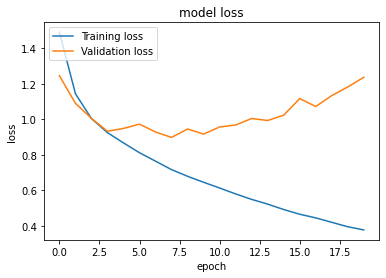

In [56]:
plot_training_loss(fit_cnn,"CNN_20epochs")

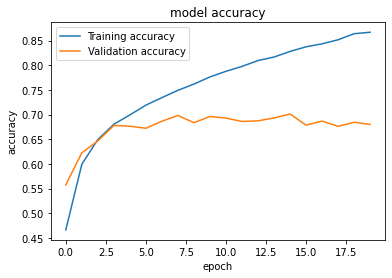

In [57]:
plot_accuracy(fit_cnn,"CNN_20epochs")

In [58]:
cnn.evaluate(X_test, y_test)
# accuracy ~ 70% => bonne précision

313/313 [==============================] - 5s 16ms/step - loss: 1.2363 - accuracy: 0.6799


[1.2363251447677612, 0.6798999905586243]

In [60]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [61]:
# Prediction model cnn
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.7552923e-04, 3.9688558e-08, 8.9667074e-06, 9.9507314e-01,
        8.4134308e-06, 4.0741442e-03, 7.5362106e-05, 2.7155868e-06,
        5.8144872e-04, 1.3825810e-07],
       [9.5836967e-06, 1.0994996e-01, 3.3566609e-09, 4.9861840e-11,
        1.0247156e-10, 1.3755327e-10, 1.7268370e-12, 3.9478696e-13,
        8.9003140e-01, 9.0820768e-06],
       [2.0609248e-02, 5.9315007e-02, 2.3974516e-04, 1.0291687e-03,
        1.4254410e-02, 6.1671904e-05, 3.4492891e-06, 9.7578659e-04,
        8.9702326e-01, 6.4883204e-03],
       [9.5365548e-01, 8.2813778e-05, 2.1991402e-02, 1.4895048e-03,
        1.9401778e-02, 1.2342859e-05, 4.1798816e-07, 1.2767137e-04,
        3.2349336e-03, 3.7267178e-06],
       [2.6318844e-10, 1.8154893e-09, 7.7808084e-04, 1.2954104e-01,
        3.8625341e-02, 3.1654956e-04, 8.3073890e-01, 1.6973532e-08,
        2.9010383e-09, 2.1490997e-08]], dtype=float32)

In [62]:
np.argmax([12,34,67,1,2,88]) # donne l'index de la cellule où le nb est maximum

5

In [63]:
np.argmax(y_pred[0])

3

In [64]:
y_classes = [np.argmax(element) for element in y_pred]

In [65]:
# comparons 15 premières valeurs de y_pred (cnn) avec y_test pour voir ci la prediction s'effectue assez bien
y_classes[:15]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1, 0, 9, 5, 7, 9]

In [66]:
y_test[:15]


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

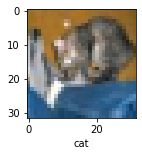

In [67]:
# visualiser la comparaison  pour voir les difficultés d'apprentissage
plot_sample(X_test,y_test,0)

In [68]:
classes[y_classes[0]]

'cat'

In [69]:
# Classification CNN
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.87      0.73      0.79      1000
           2       0.51      0.65      0.57      1000
           3       0.46      0.55      0.50      1000
           4       0.65      0.57      0.61      1000
           5       0.57      0.58      0.57      1000
           6       0.76      0.75      0.76      1000
           7       0.78      0.70      0.73      1000
           8       0.80      0.80      0.80      1000
           9       0.81      0.77      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



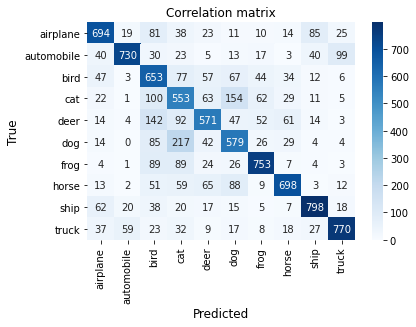

In [70]:

conf=confusion_matrix(y_test,y_classes)

plot_matrix_corr (fit_cnn,conf,classes,"correlation_matrix_CNN_20epochs")

### 3. Tentative d'amelioration des modeles

In [ ]:
#
# 
#           ------ Essayons d'améliorer le modèle ANN en changeant les params   ----



#### 3.1 Modele ann V2
On reprend notre modéle Ann et tente de l'ameliorer en changeant l'optimiser. 

In [13]:
# Construisons le modèle ANN_V2

# input image 32 x 32 x 3
#  2 deep layers : 1rst deep layer with 3000 neurons, 2nd deep layer 1000 neurons avc fct relu
# Last layer : 10 neurons avec fct sigmoid <-> 10 categories de notre classes 'classes'

# sigmoïd <-> s(z_k) = 1/ (1+ e^(-z_k))

ann_v2 = models.Sequential(
[
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# 7.b.2
# Optimizer Adam <-> Gradient stochastique  ;   fct de perte = entropie croisée parsemé par catégorie
# Mesure <-> precision

ann_v2.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# on entraine les neurons
# 7.b.4 <=> epochs = 5
fit_ann_v2=ann_v2.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

# accuracy faible 49.5% sur samples train ;    loss : 1.4320


Epoch 1/5
1563/1563 [==============================] - 209s 133ms/step - loss: 1.8899 - accuracy: 0.3276 - val_loss: 1.6771 - val_accuracy: 0.4009
Epoch 2/5
1563/1563 [==============================] - 205s 131ms/step - loss: 1.6546 - accuracy: 0.4065 - val_loss: 1.6148 - val_accuracy: 0.4155
Epoch 3/5
1563/1563 [==============================] - 204s 131ms/step - loss: 1.5728 - accuracy: 0.4354 - val_loss: 1.6118 - val_accuracy: 0.4341
Epoch 4/5
1563/1563 [==============================] - 207s 133ms/step - loss: 1.5238 - accuracy: 0.4554 - val_loss: 1.5290 - val_accuracy: 0.4523
Epoch 5/5
1563/1563 [==============================] - 206s 132ms/step - loss: 1.4824 - accuracy: 0.4709 - val_loss: 1.5010 - val_accuracy: 0.4649


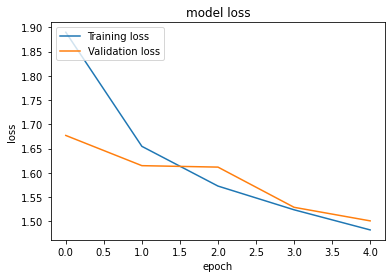

In [14]:
plot_training_loss(fit_ann_v2)

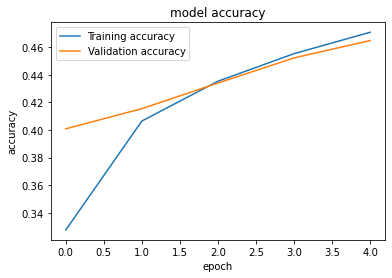

In [15]:
plot_accuracy(fit_ann_v2)

In [ ]:
# Evaluons notre modèle sur les données test
ann_v2.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


In [ ]:
# Evaluons notre modèle sur les données test
ann_v2.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =ann_v2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# 
# Recal = TruePositives / (TruePositives + FalseNegatives)
# hausse Recal => minimise faux négatif

# Mesure F = (2 * Précision * Rappel) / (Précision + Rappel)
# Mesure F ~ 0 => precision + rappel médiocre
# Mesure F1 ~ 1 => précision + rappel excellent

# Precision = TruePositives / (TruePositives + FalsePositives)
# hausse Precision => minimise faux positif

# Classification report ANN

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

In [ ]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_ann_v2,conf,classes)

In [12]:

#      -------  Model 2 CNN (cnn_v2) ------


In [13]:
# CNN <-> Feature Extraction + Classification

# Feature Extraction <-> (1) Convolution + Relu (oreille,yeux) -> (2) Pooling  -> (3) Convo + Relu(head,..)
# -> (4) Pooling  .. flatten
# Classification <-> Is it this category ?

# softmax <-> s(k)= e^(z_k)/ sum(e^(z_i),{i=1..n})
# relu <-> r(z_k) = max(z_k,0)

cnn_v2 = models.Sequential(
[
    #cnn
    
    # (1) Convolution + Relu
    # filters = 32 <=> on peut détecter 32 zones différentes sur l'image
    # kernel_size <=> taille du filtre ici 3 x 3
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    
    # (2) Pooling ici on choisit MaxPooling
    layers.MaxPooling2D((2,2)),
    
    # (3) + (4)
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [14]:
# Optimizer adam <=> optimization algorithm 
cnn_v2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
# Entrainons model cnn
fit_cnn_v2 = cnn_v2.fit(X_train, y_train, epochs = 20,validation_data=(X_test,y_test))

# accuracy  train :  ~ 0.78

Epoch 1/20
1563/1563 [==============================] - 73s 46ms/step - loss: 0.5788 - accuracy: 0.7963 - val_loss: 0.9427 - val_accuracy: 0.6973
Epoch 2/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5442 - accuracy: 0.8075 - val_loss: 0.9736 - val_accuracy: 0.6922
Epoch 3/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5088 - accuracy: 0.8213 - val_loss: 0.9769 - val_accuracy: 0.6948
Epoch 4/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4809 - accuracy: 0.8306 - val_loss: 1.0587 - val_accuracy: 0.6868
Epoch 5/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4526 - accuracy: 0.8401 - val_loss: 1.0330 - val_accuracy: 0.6968
Epoch 6/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4262 - accuracy: 0.8496 - val_loss: 1.0932 - val_accuracy: 0.6909
Epoch 7/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4051 - accuracy: 0.8558 - val_loss: 1.1559 -

In [19]:
import pickle
# sauvegarder notre modèle CNN_V2_Model_2.h5
cnn_v2.save('CNN_V2_Model.h5')
# on sauvegarde le modèle.fit
with open('CNN_V2_Model_fit', 'wb') as file_pi:
    pickle.dump(fit_cnn_v2.history, file_pi)

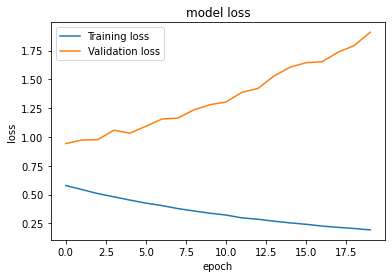

In [20]:
plot_training_loss(fit_cnn_v2,"cnn_v2")

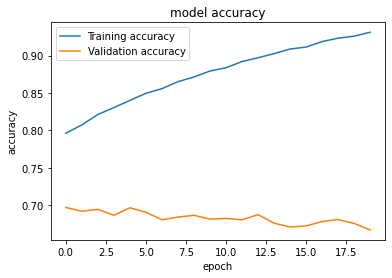

In [21]:
plot_accuracy(fit_cnn_v2,"cnn_v2")

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
# Evaluons notre modèle sur les données test
cnn_v2.evaluate(X_test, y_test)

y_pred =cnn_v2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Classification report CNN_V2

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step - loss: 1.9090 - accuracy: 0.6673
Classfication Report 
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      1000
           1       0.79      0.79      0.79      1000
           2       0.55      0.58      0.56      1000
           3       0.51      0.42      0.46      1000
           4       0.59      0.65      0.62      1000
           5       0.53      0.62      0.57      1000
           6       0.77      0.70      0.74      1000
           7       0.70      0.74      0.72      1000
           8       0.78      0.78      0.78      1000
           9       0.79      0.68      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



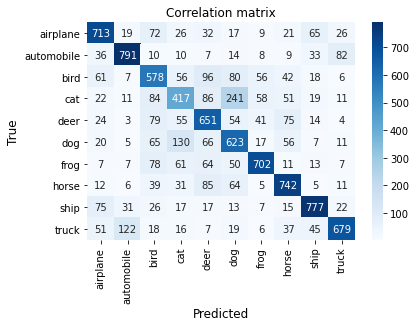

In [26]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_cnn_v2,conf,classes)

In [ ]:
#             ------------- Evaluer à partir de la sauvegarde    -------------

# plot_training_loss(fit_cnn_model_2)
        
# plot_accuracy(fit_cnn_model_2)

# cnn_model_2.evaluate(X_test, y_test)


In [12]:
# ------------------------ Grid Search --------------------------------
#3
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate = 0.001):
    ###################################################################################################################################
    # create model
    #cnn => caractértistiques modéles (TODO)
    model = models.Sequential(
    [layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')])
    optimizer = SGD(learning_rate=learn_rate)
    # Compile model
    model.compile(optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    return model
#########################################################################################################################################
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset => deja fait X_train X_test y_train y_test
X = X_train
Y= y_train
# create model
model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
#optimizer = ['Adam','SGD']
learn_rate =[0.0001,0.001,0.01,0.1,0.3]
epochs = [10, 50]
batch_size = [10, 20, 40]
param_grid = dict(learn_rate=learn_rate,epochs=epochs,batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))